In [81]:
import pandas as pd
import numpy as np
import nibabel as nib
import os
from nilearn import plotting
from nibabel import FileHolder
from nibabel.analyze import AnalyzeImage
from nibabel.testing import data_path
from scipy import stats
import glob
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

### Two-Samples T-Test

In [13]:
def two_samples_t_test(fp1,fp2):
    os.chdir(fp1)
    fn = glob.glob('*.img')
    img = nib.load(os.getcwd() + '/' + fn[0])
    image_data = img.get_data()
    l = list(image_data.shape)
    l.append(1)
    image_data.shape = l
    for i in range(0, len(fn)):
        img = nib.load(os.getcwd() + '/' + fn[i])
        temp = img.get_data()
        l = list(temp.shape)
        l.append(1)
        temp.shape = l
        image_data = np.append(temp, image_data, axis = 3)
    mean_data = np.mean(image_data, axis = 3)
    img = nib.load(os.getcwd() + '/' + fn[0])
    new_img = nib.Nifti1Image(mean_data, img.affine, img.header)
    contrast1 = fn[0][5:len(fn[0])-4]
    n_subjects = image_data[0,0,0,:].shape[0]
    vector1 = np.reshape(image_data,(np.product(image_data.shape[0:3]),n_subjects),order='F')
    
    os.chdir(fp2)
    fn = glob.glob('*.img')
    img = nib.load(os.getcwd() + '/' + fn[0])
    image_data = img.get_data()
    l = list(image_data.shape)
    l.append(1)
    image_data.shape = l
    for i in range(0, len(fn)):
        img = nib.load(os.getcwd() + '/' + fn[i])
        temp = img.get_data()
        l = list(temp.shape)
        l.append(1)
        temp.shape = l
        image_data = np.append(temp, image_data, axis = 3)
    mean_data = np.mean(image_data, axis = 3)
    img = nib.load(os.getcwd() + '/' + fn[0])
    new_img = nib.Nifti1Image(mean_data, img.affine, img.header)
    contrast2 = fn[0][5:len(fn[0])-4]
    n_subjects = image_data[0,0,0,:].shape[0]
    vector2 = np.reshape(image_data,(np.product(image_data.shape[0:3]),n_subjects),order='F')
    
    vector = vector1 - vector2
    temp = stats.ttest_1samp(vector[0,:],0)
    t = temp.statistic
    p = temp.pvalue
    for i in range(1, np.product(image_data.shape[0:3])):
        temp = stats.ttest_1samp(vector[i,:],0)
        t = np.append(t,temp.statistic)
    tmap = np.reshape(t,(53,63,54),order='F')
    img = nib.load(os.getcwd() + '/' + fn[0])
    new_tmap = nib.Nifti1Image(tmap, img.affine, img.header)
    print('Tmap for difference between contrasts: ' + contrast1 + ' vs. ' + contrast2 + ', using an One-Sample T-Test')
    plotting.plot_stat_map(new_tmap,threshold='auto',cut_coords=[36,-27,60])
    f = r'C:\Users\Rsv19\OneDrive\Documenten\Master CSAI\Thesis\fMRI_imgs'
    nib.save(new_tmap, f + '/' + contrast1 + '_vs_' + contrast2 + '_1.nii')
    plotting.show()
    
    temp = stats.ttest_ind(vector1[0,:],vector2[0,:])
    t = temp.statistic
    p = temp.pvalue
    for i in range(1, np.product(image_data.shape[0:3])):
        temp = stats.ttest_ind(vector1[i,:],vector2[i,:])
        t = np.append(t,temp.statistic)
    tmap = np.reshape(t,(53,63,54),order='F')
    img = nib.load(os.getcwd() + '/' + fn[0])
    new_tmap = nib.Nifti1Image(tmap, img.affine, img.header)
    print('Tmap for difference between contrasts: ' + contrast1 + ' vs. ' + contrast2 + ', using a Two-Sample T-Test')
    plotting.plot_stat_map(new_tmap,threshold='auto',cut_coords=[36,-27,60])
    nib.save(new_tmap, f + '/' + contrast1 + '_vs_' + contrast2 + '_2.nii')
    plotting.show()

C:\Users\Rsv19\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Rsv19\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Rsv19\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Tmap for difference between contrasts: C_OLD_T_OLD_O_HI_gt_F vs. C_PAS_T_OLD_O_HI_gt_F, using an One-Sample T-Test


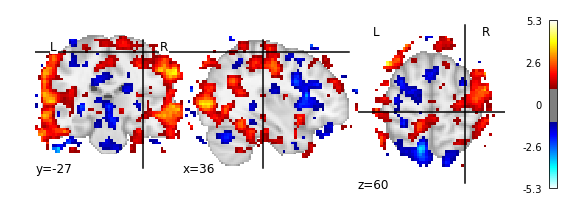

Tmap for difference between contrasts: C_OLD_T_OLD_O_HI_gt_F vs. C_PAS_T_OLD_O_HI_gt_F, using a Two-Sample T-Test


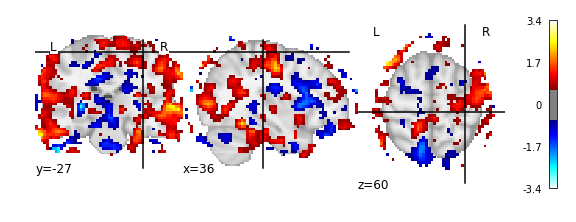

In [14]:
two_samples_t_test(r'C:\Users\Rsv19\Dropbox\student_folder (for Ruben)\fMRI_with_python\C_OLD_T_OLD_O_HI_gt_F',r'C:\Users\Rsv19\Dropbox\student_folder (for Ruben)\fMRI_with_python\C_PAS_T_OLD_O_HI_gt_F'
)

### Correlation

In [120]:
df = pd.read_csv(r'C:\Users\Rsv19\OneDrive\Documenten\Master CSAI\Thesis\pars.csv')
df = df.loc[df['cue_target'] == 'new']
df = df[df["subject"]!=15]
df = df[df["subject"]!=33]
df

,subject,cue_target,v_1,v_2,a_1,a_2,t0,b,sv,objective,convergence,AIC,aic
2,1,new,0.511797,0.523922,-0.001324,0.244629,-2.355757,1.560824e+00,0.039946,162.271844,0,338.543687,338.543687
5,2,new,0.399579,0.523081,-0.211878,0.142227,0.280953,2.565369e-01,0.179060,57.024163,0,128.048327,128.048327
8,4,new,0.538034,0.574863,-0.218338,0.103764,-0.157994,5.414063e-01,0.188972,161.671841,0,337.343683,337.343683
10,6,new,0.485513,0.544375,0.089580,0.092949,-0.101219,5.051896e-01,0.074008,-37.213229,0,-60.426457,-60.426457
14,7,new,0.432866,0.547058,0.237663,0.177658,0.458058,9.122416e-02,0.101051,-65.870500,0,-117.741001,-117.741001
15,8,new,0.495681,0.504327,-0.008952,-0.507808,-1.883339,1.370781e+00,0.030679,13.965384,0,41.930768,41.930768
19,9,new,0.494074,0.560289,0.198064,0.236489,0.366488,1.663733e-01,0.155312,38.665741,0,91.331483,91.331483
22,10,new,0.396690,0.496663,0.259662,-0.710149,0.211203,2.420596e-01,0.154789,93.584261,0,201.168522,201.168522
26,11,new,0.492830,0.558336,0.327710,0.286874,0.154734,2.414679e-01,0.118947,91.250196,0,196.500391,196.500391
29,12,new,0.439087,0.560358,0.219155,0.257647,0.211892,2.168791e-01,0.128311,44.197725,0,102.395449,102.395449


In [85]:
def correlation(cue,par,fp):
    df = pd.read_csv(r'C:\Users\Rsv19\OneDrive\Documenten\Master CSAI\Thesis\pars.csv')
    df = df.loc[df['cue_target'] == cue]
    df = df[df["subject"]!=15]
    df = df[df["subject"]!=33]
    
    os.chdir(fp)
    fn = glob.glob('*.img')
    img = nib.load(os.getcwd() + '/' + fn[0])
    image_data = img.get_data()
    l = list(image_data.shape)
    l.append(1)
    image_data.shape = l
    for i in range(1, len(fn)):
        img = nib.load(os.getcwd() + '/' + fn[i])
        temp = img.get_data()
        l = list(temp.shape)
        l.append(1)
        temp.shape = l
        image_data = np.append(temp, image_data, axis = 3)
    mean_data = np.mean(image_data, axis = 3)
    img = nib.load(os.getcwd() + '/' + fn[0])
    new_img = nib.Nifti1Image(mean_data, img.affine, img.header)
    n_subjects = image_data[0,0,0,:].shape[0]
    contrast = fn[0][5:len(fn[0])-4]
    vector = np.reshape(image_data,(np.product(image_data.shape[0:3]),n_subjects),order='F')
    
    r_values = []
    for ii in range(0, np.product(image_data.shape[0:3])):
        r,p = stats.pearsonr(df[par],vector[ii,:])
        r_values = np.append(r_values,r)  
    rmap = np.reshape(r_values,(53,63,54),order='F')
    img = nib.load(os.getcwd() + '/' + fn[0])
    new_rmap = nib.Nifti1Image(rmap, img.affine, img.header)
    print('Rmap for correlation between parameter ' + par + ' and contrast ' + fn[0][5:len(fn[0])-4] + ', for the ' + cue + ' cue condition.')
    plotting.plot_stat_map(new_rmap,threshold=0.3)
    f = r'C:\Users\Rsv19\OneDrive\Documenten\Master CSAI\Thesis\fMRI_imgs'
    nib.save(new_rmap, f + '/' + contrast + '_vs_' + par + '_' + cue + '_correlation.nii')
    plotting.show()

C:\Users\Rsv19\Anaconda3\lib\site-packages\scipy\stats\stats.py:5240: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


Rmap for correlation between parameter a_1 and contrast C_NEW_T_NEW_O_CR_gt_F, for the new cue condition.


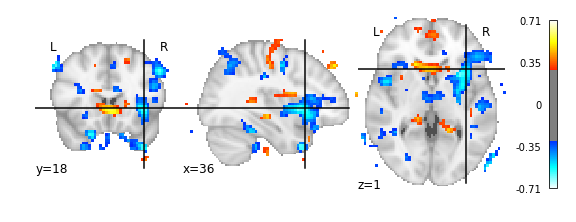

In [86]:
correlation('new','a_1',r'C:\Users\Rsv19\Dropbox\student_folder (for Ruben)\fMRI_with_python\C_NEW_T_NEW_O_CR_gt_F')

### Linear Regression

In [118]:
def linear_regression(cue,pars,fp):
    df = pd.read_csv(r'C:\Users\Rsv19\OneDrive\Documenten\Master CSAI\Thesis\pars.csv')
    df = df.loc[df['cue_target'] == cue]
    df = df[df["subject"]!=15]
    df = df[df["subject"]!=33]
    
    os.chdir(fp)
    fn = glob.glob('*.img')
    img = nib.load(os.getcwd() + '/' + fn[0])
    image_data = img.get_data()
    l = list(image_data.shape)
    l.append(1)
    image_data.shape = l
    for i in range(1, len(fn)):
        img = nib.load(os.getcwd() + '/' + fn[i])
        temp = img.get_data()
        l = list(temp.shape)
        l.append(1)
        temp.shape = l
        image_data = np.append(temp, image_data, axis = 3)
    mean_data = np.mean(image_data, axis = 3)
    img = nib.load(os.getcwd() + '/' + fn[0])
    new_img = nib.Nifti1Image(mean_data, img.affine, img.header)
    n_subjects = image_data[0,0,0,:].shape[0]
    contrast = fn[0][5:len(fn[0])-4]
    vector = np.reshape(image_data,(np.product(image_data.shape[0:3]),n_subjects),order='F')
    vector = np.nan_to_num(vector)
    v = np.mean(vector,axis=0)

    y = v
    x = df[pars]

    regr = linear_model.LinearRegression()
    regr.fit(x,y)
    
    print('Linear Regression results (using sklearn) for predicting the contrast ' + fn[0][5:len(fn[0])-4] + ', using the parameters ' + (str(pars)[1:-1]) + ', for the ' + cue + ' cue condition.')
    print()
    print('Intercept: \n', regr.intercept_)
    print('Coefficients: \n', regr.coef_)
    print()
    x = sm.add_constant(x)

    model = sm.OLS(y,x).fit()
    predictions = model.predict(x)

    print_model = model.summary()
    print('Linear Regression results (using statsmodels) for predicting the contrast ' + fn[0][5:len(fn[0])-4] + ', using the parameters ' + (str(pars)[1:-1]) + ', for the ' + cue + ' cue condition.')
    print()
    print(print_model)

In [122]:
linear_regression('new', ['v_1','v_2','a_1','a_2','sv','b','t0'],r'C:\Users\Rsv19\Dropbox\student_folder (for Ruben)\fMRI_with_python\C_NEW_T_NEW_O_CR_gt_F')

Linear Regression results (using sklearn) for predicting the contrast C_NEW_T_NEW_O_CR_gt_F, using the parameters 'v_1', 'v_2', 'a_1', 'a_2', 'sv', 'b', 't0', for the new cue condition.

Intercept: 
 -0.01848899632428573
Coefficients: 
 [-0.01791171  0.07203799 -0.05592259  0.02694018 -0.03998661 -0.00463728
 -0.00637153]

Linear Regression results (using statsmodels) for predicting the contrast C_NEW_T_NEW_O_CR_gt_F, using the parameters 'v_1', 'v_2', 'a_1', 'a_2', 'sv', 'b', 't0', for the new cue condition.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.212
Date:                Sun, 24 Jun 2018   Prob (F-statistic):              0.322
Time:                        15:56:01   Log-Likelihood:                 80.783
No. Observ